In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Task 1: Load and Explore the Dataset
try:
    # Load the COVID-19 dataset
    url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
    df = pd.read_csv(url)

    # Display the first few rows
    print("First few rows of the dataset:")
    print(df.head())

    # Check the structure of the dataset
    print("\nDataset info:")
    print(df.info())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Clean the dataset by dropping rows with missing values in key columns
    df_clean = df.dropna(subset=['total_cases', 'new_cases', 'total_deaths', 'continent'])

except Exception as e:
    print("An error occurred while loading the dataset:", e)


First few rows of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand

In [3]:
# Task 2: Basic Data Analysis
print("\nDescriptive statistics for numerical columns:")
print(df_clean.describe())

# Grouping by continent and computing mean total_cases
continent_group = df_clean.groupby('continent')['total_cases'].mean()
print("\nAverage total cases per continent:")
print(continent_group)



Descriptive statistics for numerical columns:
        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.900710e+05  3.900710e+05        3.889010e+05  3.900710e+05   
mean   1.624900e+06  1.989215e+03        1.995095e+03  1.874677e+04   
std    6.880653e+06  8.585827e+04        3.244760e+04  7.292378e+04   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    5.507000e+03  0.000000e+00        0.000000e+00  3.700000e+01   
50%    4.956800e+04  0.000000e+00        8.714000e+00  6.490000e+02   
75%    5.448030e+05  0.000000e+00        2.040000e+02  7.118000e+03   
max    1.034368e+08  4.047548e+07        5.782211e+06  1.127152e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  390059.000000        388889.000000            390071.000000   
mean       17.922478            17.985128            111690.175508   
std       314.640512           117.954098            163004.983164   
min         0.000000             

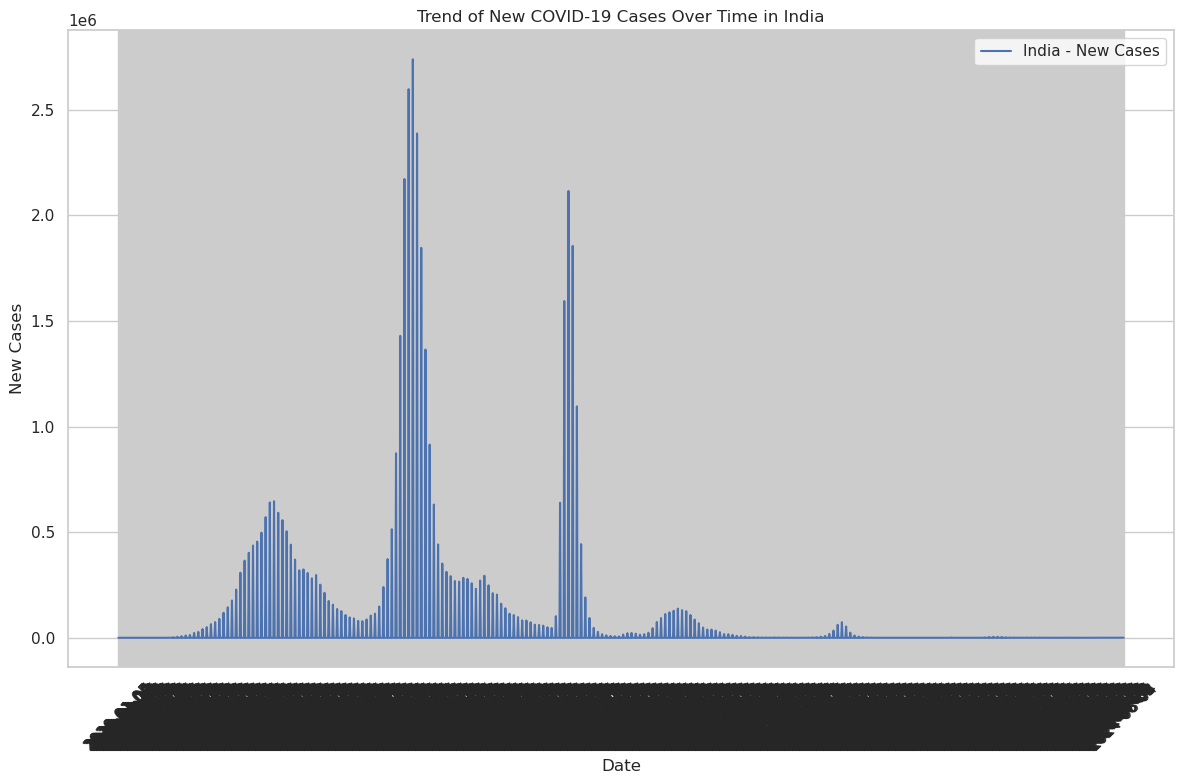

In [4]:
# Task 3: Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Line chart: trend of new cases over time for one country (e.g., India)
india_data = df_clean[df_clean['location'] == 'India']
plt.plot(india_data['date'], india_data['new_cases'], label='India - New Cases')
plt.xticks(rotation=45)
plt.title('Trend of New COVID-19 Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

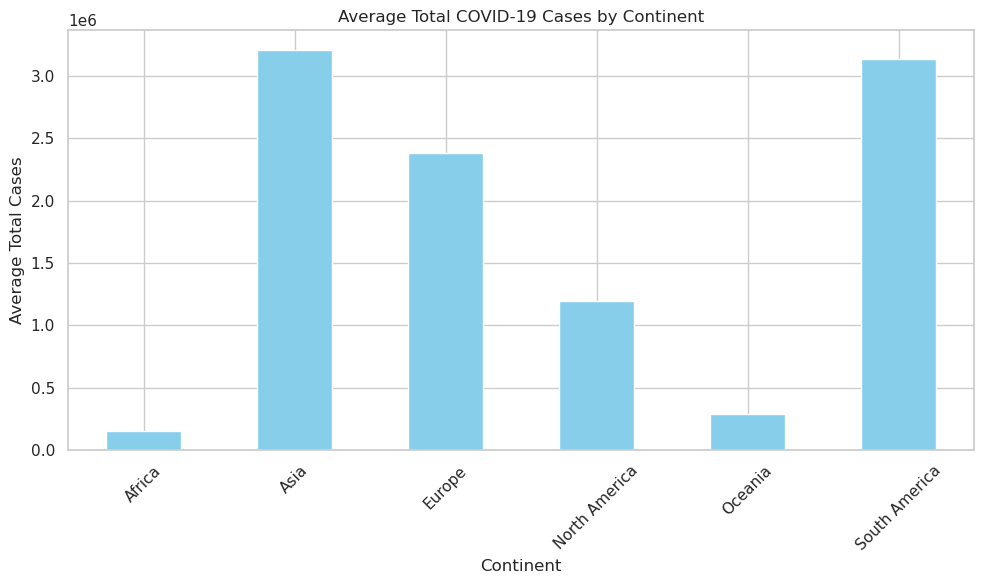

In [5]:
# Bar chart: average total cases per continent
plt.figure(figsize=(10, 6))
continent_group.plot(kind='bar', color='skyblue')
plt.title('Average Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

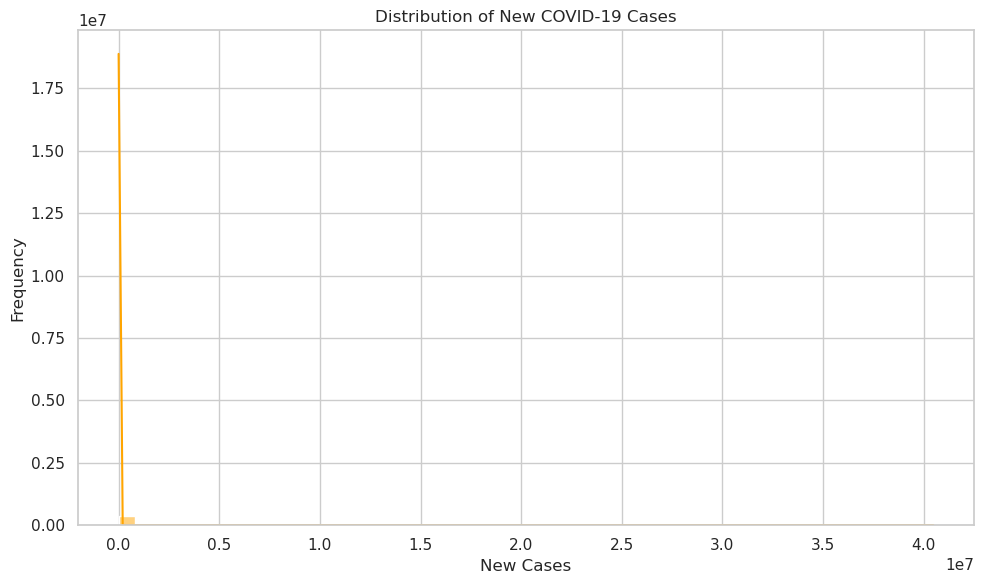

In [6]:
# Histogram: distribution of new cases
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['new_cases'], bins=50, kde=True, color='orange')
plt.title('Distribution of New COVID-19 Cases')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show

In [ ]:
# Scatter plot: total cases vs total deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='total_cases', y='total_deaths', hue='continent', alpha=0.6)
plt.title('Total Cases vs Total Deaths by Continent')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()